#### SpaceX Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [4]:
# Exploratory Data Analysis
# First, let's read the SpaceX dataset into a Pandas dataframe and print its summary
import requests
import io

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the dataset using requests
response = requests.get(URL)

# Ensure the request was successful
if response.status_code == 200:
    # Read the data into a DataFrame
    dataset_part_2_csv = io.BytesIO(response.content)
    df = pd.read_csv(dataset_part_2_csv)
    print(df.head(5))  # Display the first 5 rows
else:
    print(f"Failed to fetch the dataset. HTTP status code: {response.status_code}")


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

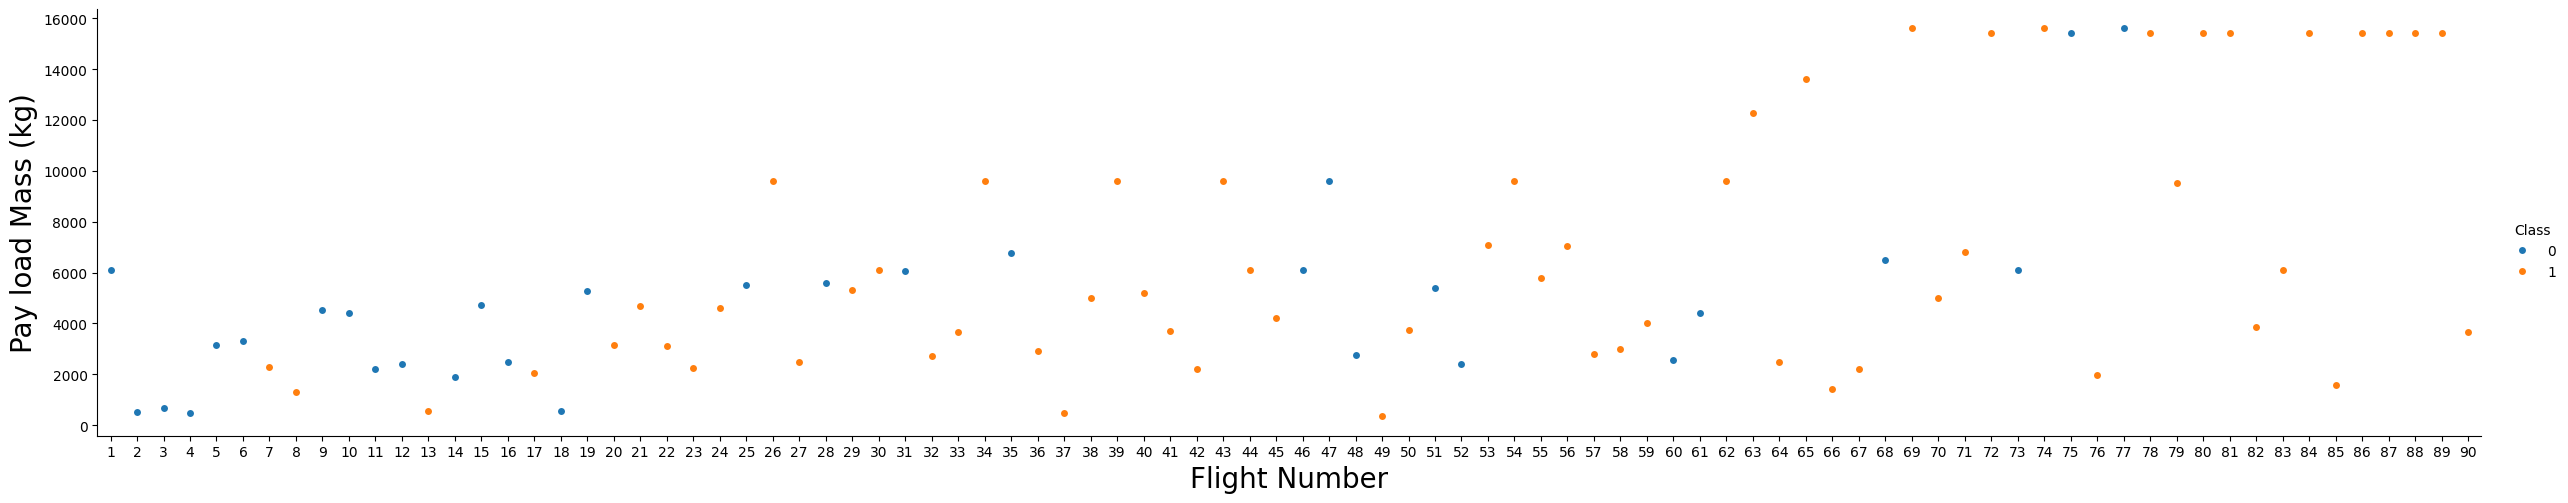

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.
#### TASK 1: Visualize the relationship between Flight Number and Launch Site
Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

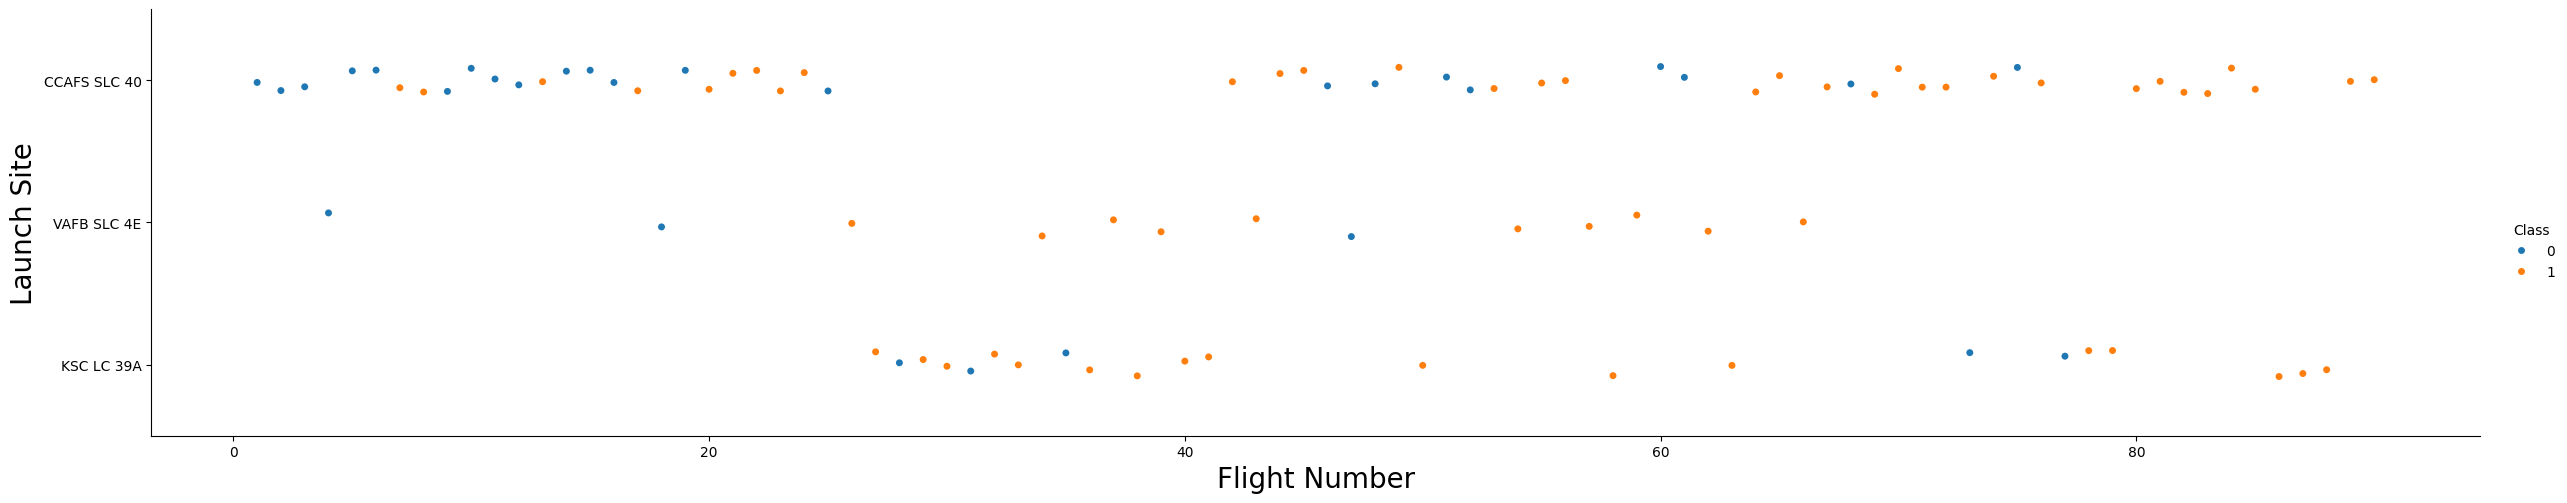

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.
 - CC.... er primær affyringssted for lave og høje flynumre
 - KSC... er primær for mellemstørrelsesnumre

#### TASK 2: Visualize the relationship between Payload Mass and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.

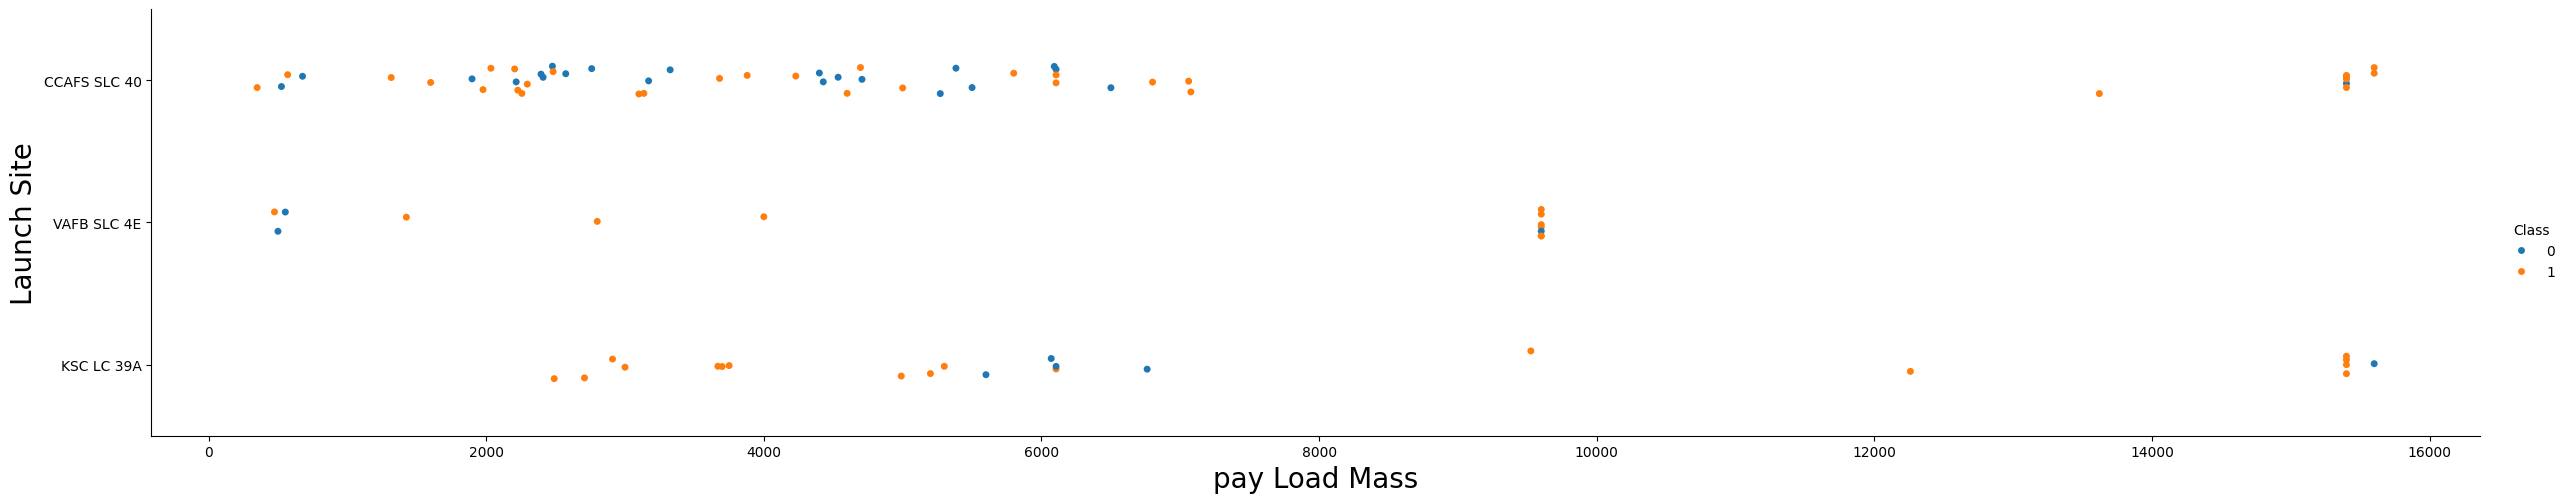

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("pay Load Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

#### TASK 3: Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a bar chart for the sucess rate of each orbit

C:\Users\janchri\AppData\Local\Temp\ipykernel_22980\3783088924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Orbit', y='Class', palette='viridis')


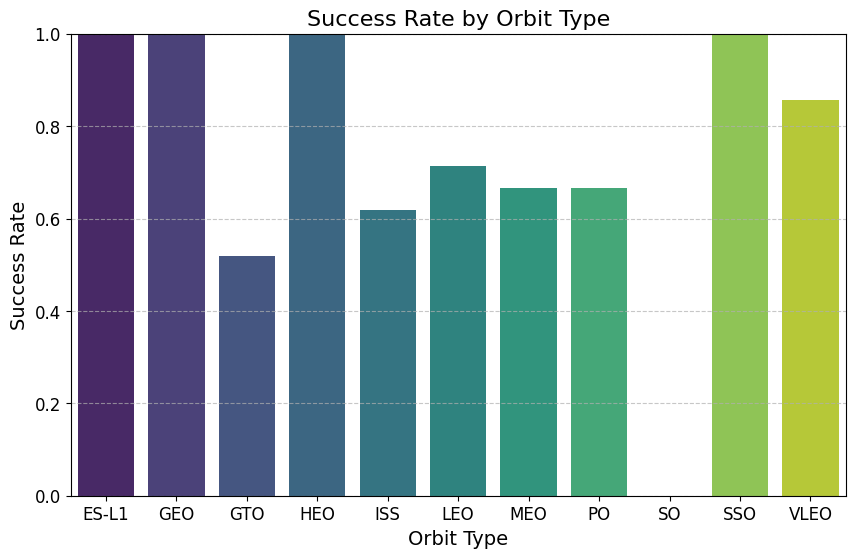

In [17]:
# Group by Orbit and calculate success rate
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Step 2: Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate, x='Orbit', y='Class', palette='viridis')
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1)  # Success rate is a fraction
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### TASK 4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

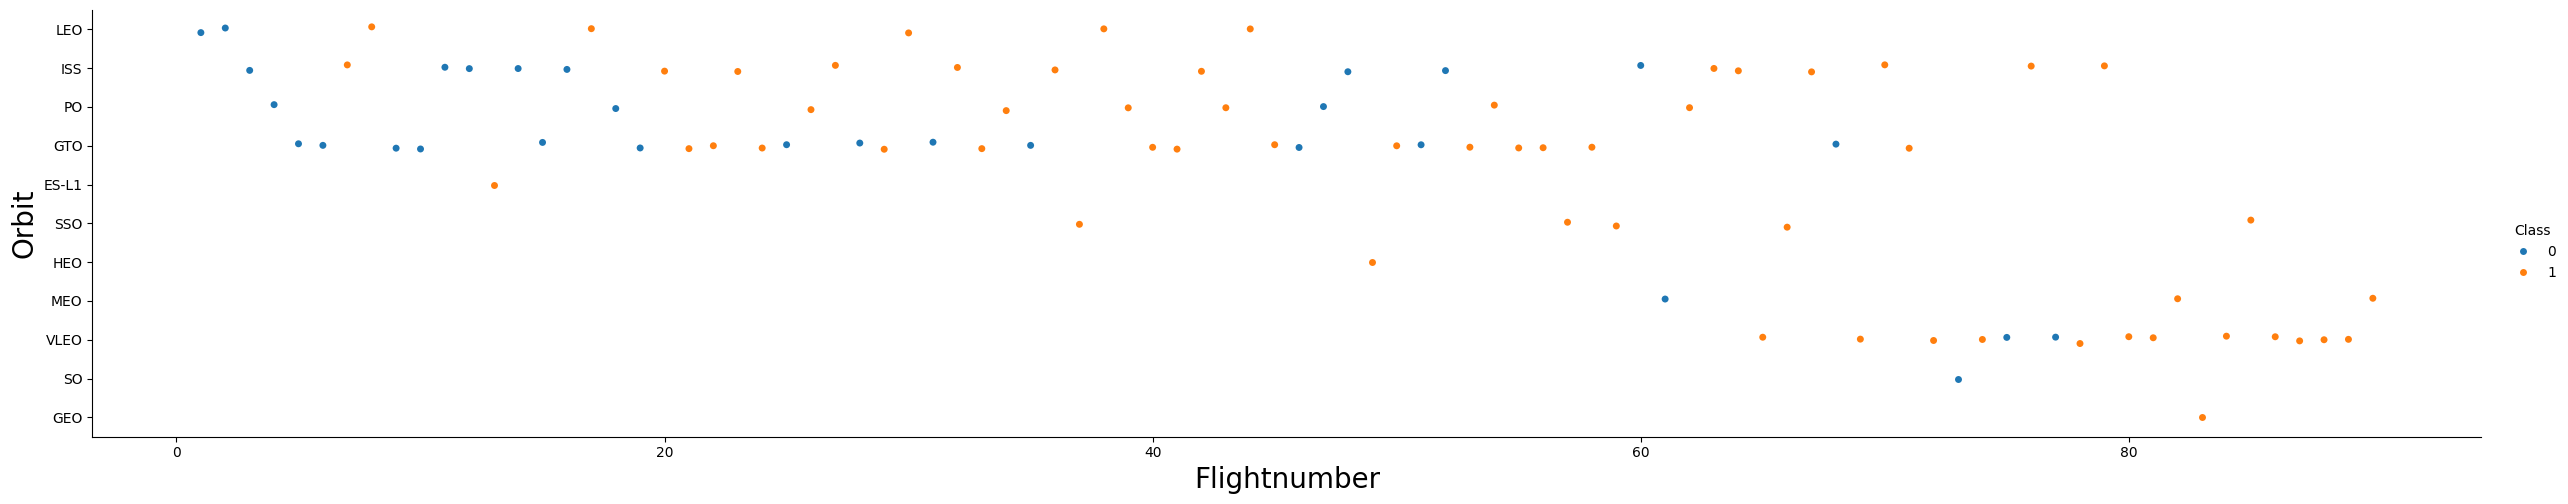

In [18]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flightnumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

 - You can observe that in the LEO orbit, success seems to be related to the number of flights. 
 - Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

#### TASK 5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

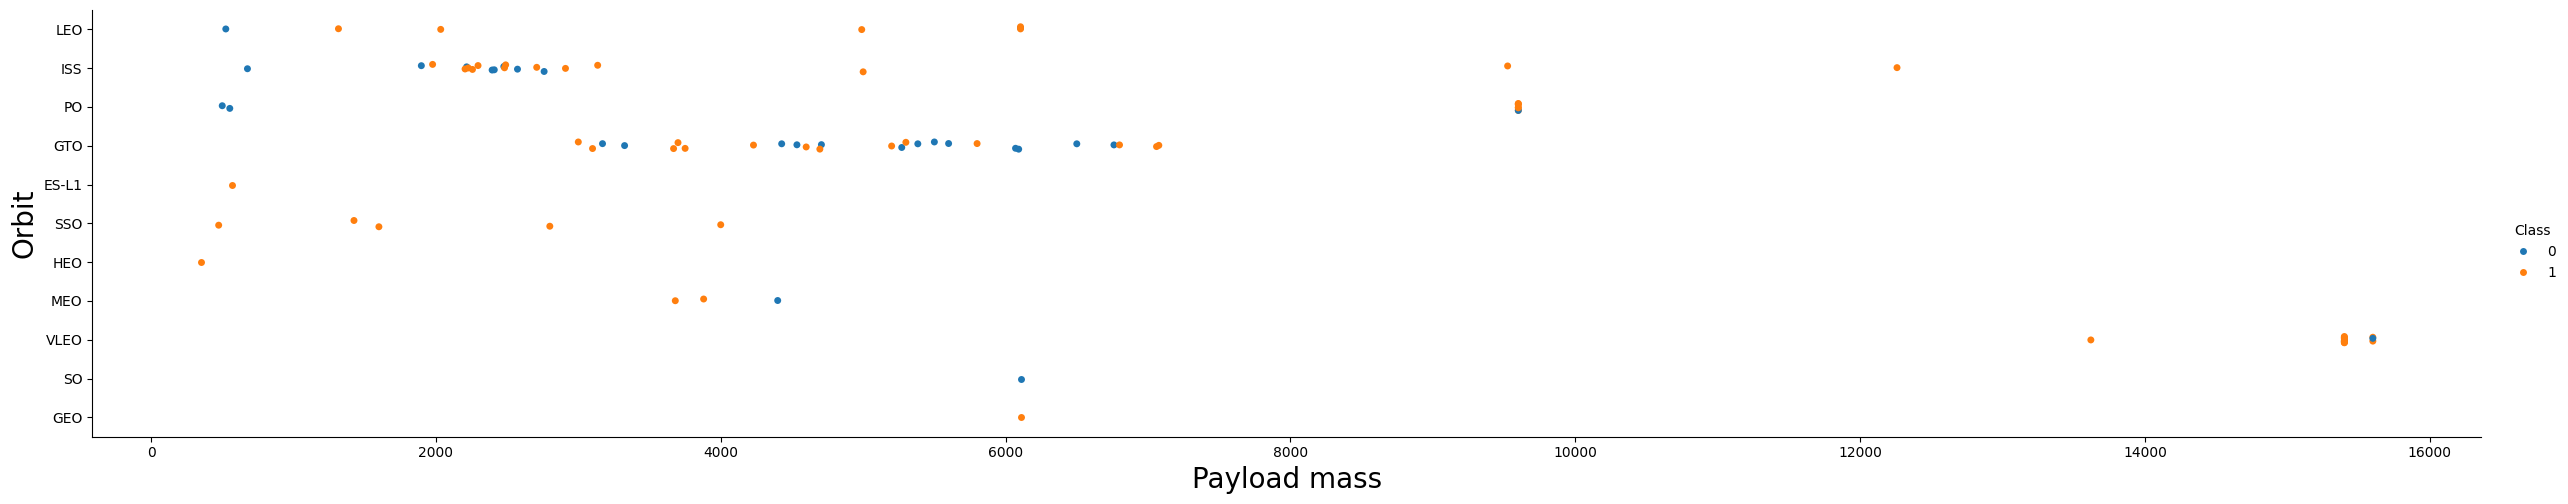

In [19]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

 - With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
 - However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

#### TASK 6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

In [20]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


C:\Users\janchri\AppData\Local\Temp\ipykernel_22980\18320642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Date', y='Class', palette='viridis')


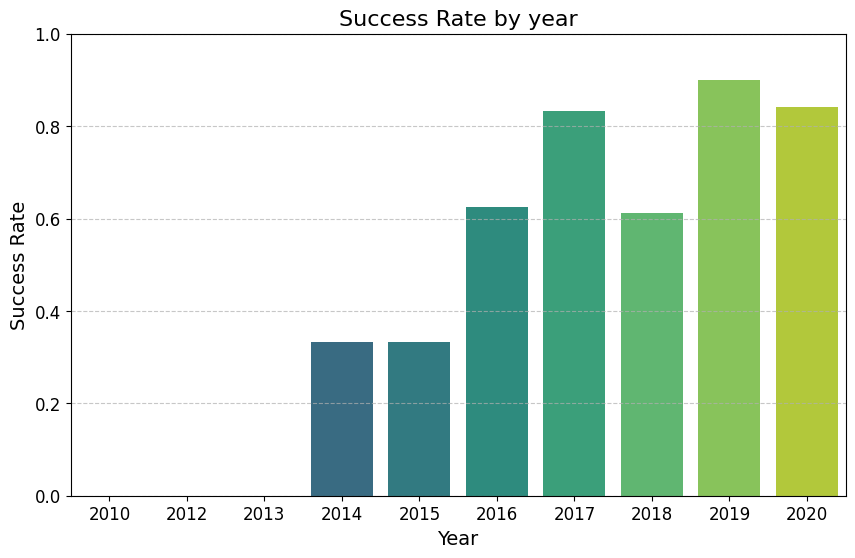

In [21]:
# Group by Orbit and calculate success rate
success_rate = df.groupby('Date')['Class'].mean().reset_index()

# Step 2: Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate, x='Date', y='Class', palette='viridis')
plt.title('Success Rate by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1)  # Success rate is a fraction
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

### Features Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### TASK 7: Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [28]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad','Serial'])
features_one_hot.head

<bound method NDFrame.head of     FlightNumber   PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0              1   6104.959412        1     False   False  False    1.0   
1              2    525.000000        1     False   False  False    1.0   
2              3    677.000000        1     False   False  False    1.0   
3              4    500.000000        1     False   False  False    1.0   
4              5   3170.000000        1     False   False  False    1.0   
..           ...           ...      ...       ...     ...    ...    ...   
85            86  15400.000000        2      True    True   True    5.0   
86            87  15400.000000        3      True    True   True    5.0   
87            88  15400.000000        6      True    True   True    5.0   
88            89  15400.000000        3      True    True   True    5.0   
89            90   3681.000000        1      True   False   True    5.0   

    ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1

#### TASK 8: Cast all numeric columns to float64
Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [29]:
features_one_hot=features_one_hot.astype('Float64')

In [30]:
# We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [36]:
features_one_hot.shape

(90, 80)